In [2]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
(df == 'none').sum()


gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                       0
reading score                    0
writing score                    0
dtype: int64

In [13]:
df['test preparation course'] = df['test preparation course'].fillna('none')


In [17]:
(df == 'none').sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                       0
reading score                    0
writing score                    0
dtype: int64

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


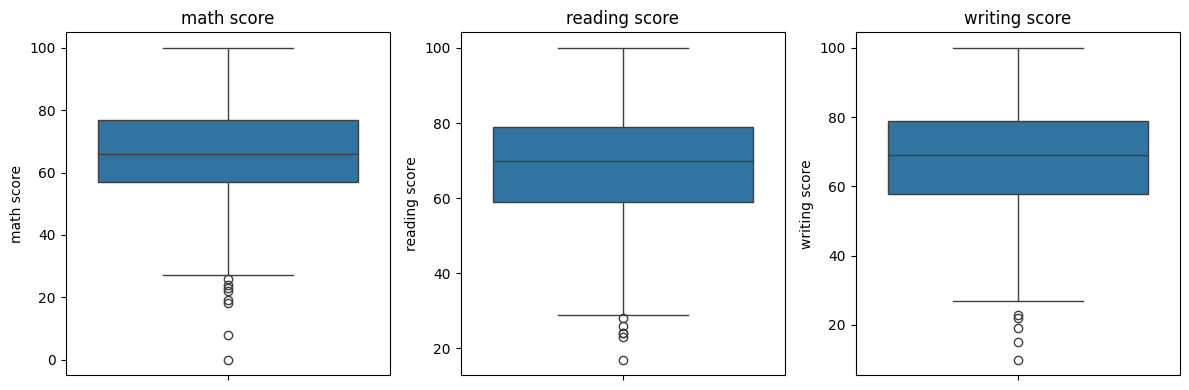

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for outliers
plt.figure(figsize=(12,4))
for i, column in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


# Note:
Outliers were detected in all three score columns, mostly low scores. Since these appear to be real values representing poor student performance rather than data errors, we decided to retain them in the dataset to preserve data integrity.


In [20]:
# Create total_score column
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Create average_score column
df['average_score'] = df['total_score'] / 3


In [21]:
df[['math score', 'reading score', 'writing score', 'total_score', 'average_score']].head()


,math score,reading score,writing score,total_score,average_score
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


In [25]:
df.to_csv('StudentsPerformance.csv', index=False)


In [26]:
df =pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
